# Stochastic infectious pulse
https://github.com/alvason/stochastic-infectious-pulse

### Stochastic version for evolutionary insights

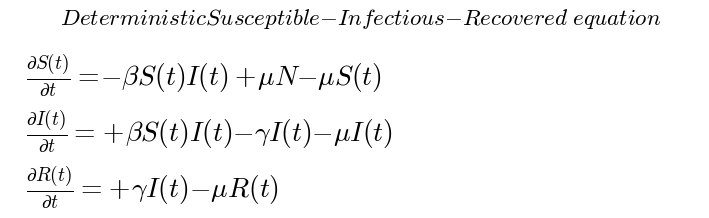

In [1]:
'''
author: Alvason Zhenhua Li
date:   07/07/2015
'''
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import os
dir_path = '/Users/al/Desktop/GitHub/stochastic-infectious-pulse/figure'
file_name = 'stochastic-sir'

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 8)
numberingFig = 0

numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(12, 3))
plt.axis('off')
plt.title(r'$ Deterministic Susceptible-Infectious-Recovered \ equation $', fontsize = AlvaFontSize)
plt.text(0, 2.0/3, r'$ \frac{\partial S(t)}{\partial t} = \
         -\beta S(t)I(t) +\mu N -\mu S(t)$', fontsize = 1.2*AlvaFontSize)
plt.text(0, 1.0/3, r'$ \frac{\partial I(t)}{\partial t} = \
         +\beta S(t)I(t) - \gamma I(t) -\mu I(t) $', fontsize = 1.2*AlvaFontSize)
plt.text(0, 0.0/3, r'$ \frac{\partial R(t)}{\partial t} = \
         +\gamma I(t) - \mu R(t) $', fontsize = 1.2*AlvaFontSize)
plt.show()

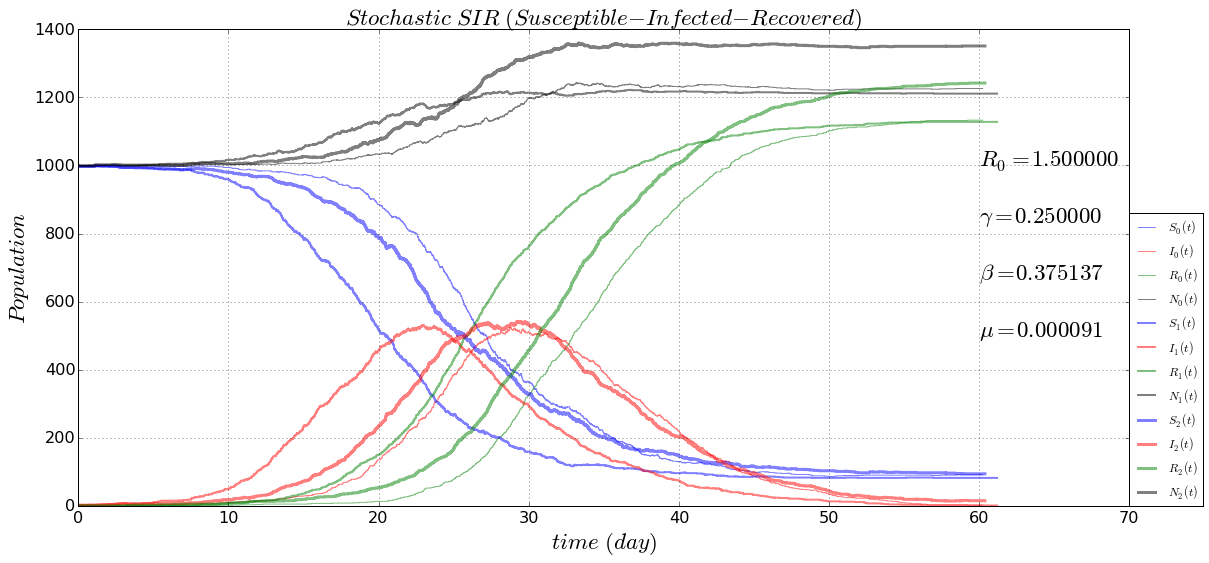

In [2]:
''' starting from one infected '''
# setting parameter
timeUnit = 'day'
if timeUnit == 'day':
    day = 1
    year = 365 
elif timeUnit == 'year':
    year = 1
    day = float(1)/365 
    
total_SIR = 10**3
initial_I = 1
initial_S = total_SIR - initial_I
initial_R = total_SIR - initial_S - initial_I

reprodNum = float(1.5) # basic reproductive number R0: one infected person will transmit to 1.8 person 
recovRate = float(1)/(4*day) # 4 days per period ==> rate/year = 365/4
inOutRate = float(1)/(30*year) # birth rate per year
infecRate = reprodNum*(recovRate + inOutRate)/1 # per year, per person, per total-population

# initial boundary condition
minT = float(0*day)
maxT = float(60*day)

# stochastic evolution way
total_way = int(3)
total_step = int(maxT*total_SIR)
gTT = np.zeros([total_way, total_step]) 
gSS = np.zeros([total_way, total_step]) 
gII = np.zeros([total_way, total_step]) 
gRR = np.zeros([total_way, total_step]) 
gT = np.zeros([total_step]) 
gS = np.zeros([total_step]) 
gI = np.zeros([total_step]) 
gR = np.zeros([total_step]) 
for i in range(total_way):   
    j = int(0)
    # intialized
    gT[j] = minT
    gS[j] = initial_S
    gI[j] = initial_I
    gR[j] = initial_R 
    # storing
    gTT[i, j] = gT[j]
    gSS[i, j] = gS[j]
    gII[i, j] = gI[j]
    gRR[i, j] = gR[j] 
    # all possible events
    event_SI = infecRate*gS[j]*gI[j]/(gS[j] + gI[j] + gR[j])
    event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
    event_Sout = inOutRate*gS[j]
    event_IR = recovRate*gI[j]
    event_Iout = inOutRate*gI[j]
    event_Rout = inOutRate*gR[j]
    ###
    while (gT[j] < maxT):
        event_all = event_SI + event_SIRin + event_Sout + event_IR + event_Iout + event_Rout          
        dt = -np.log(np.random.random())/event_all 
        # SI infect-event
        if np.random.random() < (event_SI/event_all):                      
            gS[j] = gS[j] - 1
            gI[j] = gI[j] + 1
            event_SI = infecRate*gS[j]*gI[j]/(gS[j] + gI[j] + gR[j])
            event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
            event_Sout = inOutRate*gS[j]
            event_IR = recovRate*gI[j]
            event_Iout = inOutRate*gI[j]
            event_Rout = inOutRate*gR[j]
        # SIR in-event
        elif np.random.random() < ((event_SI + event_SIRin)/event_all):                      
            gS[j] = gS[j] + 1 
            event_SI = infecRate*gS[j]*gI[j]/(gS[j] + gI[j] + gR[j])
            event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
            event_Sout = inOutRate*gS[j]
            event_IR = recovRate*gI[j]
            event_Iout = inOutRate*gI[j]
            event_Rout = inOutRate*gR[j]
        # S out-event    
        elif np.random.random() < ((event_SI + event_SIRin + event_Sout)/event_all):   
            gS[j] = gS[j] - 1 
            event_SI = infecRate*gS[j]*gI[j]/(gS[j] + gI[j] + gR[j])
            event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
            event_Sout = inOutRate*gS[j]
            event_IR = recovRate*gI[j]
            event_Iout = inOutRate*gI[j]
            event_Rout = inOutRate*gR[j]
        # R recovered-event
        elif np.random.random() < ((event_SI + event_SIRin + event_Sout + event_IR)/event_all):    
            gI[j] = gI[j] - 1
            gR[j] = gR[j] + 1
            event_SI = infecRate*gS[j]*gI[j]/(gS[j] + gI[j] + gR[j])
            event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
            event_Sout = inOutRate*gS[j]
            event_IR = recovRate*gI[j]
            event_Iout = inOutRate*gI[j]
            event_Rout = inOutRate*gR[j]
        # I out-event
        elif np.random.random() < ((event_SI + event_SIRin + event_Sout + event_IR + event_Iout)/event_all):    
            gI[j] = gI[j] - 1
            event_SI = infecRate*gS[j]*gI[j]/(gS[j] + gI[j] + gR[j])
            event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
            event_Sout = inOutRate*gS[j]
            event_IR = recovRate*gI[j]
            event_Iout = inOutRate*gI[j]
            event_Rout = inOutRate*gR[j]
        # R out event
        else: 
            gR[j] = gR[j] - 1
            event_SI = infecRate*gS[j]*gI[j]/(gS[j] + gI[j] + gR[j])
            event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
            event_Sout = inOutRate*gS[j]
            event_IR = recovRate*gI[j]
            event_Iout = inOutRate*gI[j]
            event_Rout = inOutRate*gR[j]
        # next step is based on current step
        j = j + 1
        gT[j] = gT[j - 1] + dt 
        gS[j] = gS[j - 1]
        gI[j] = gI[j - 1]
        gR[j] = gR[j - 1]
    # set the value of remaining steps = value of the last step (for ending)
    gT[j:] = gT[j]
    gS[j:] = gS[j]
    gI[j:] = gI[j]
    gR[j:] = gR[j]
    # storing
    gTT[i] = gT
    gSS[i] = gS
    gII[i] = gI
    gRR[i] = gR 

# plotting
figure_name = '-sir'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
for i in range(total_way):
    plt.plot(gTT[i], gSS[i], drawstyle = 'steps', label = r'$ S_{:}(t) $'.format(i), linewidth = (1 + i)
             , color = 'blue', alpha = float(0.5 + i/total_way))
    plt.plot(gTT[i], gII[i], drawstyle = 'steps', label = r'$ I_{:}(t) $'.format(i), linewidth = (1 + i)
             , color = 'red', alpha = float(0.5 + i/total_way))
    plt.plot(gTT[i], gRR[i], drawstyle = 'steps', label = r'$ R_{:}(t) $'.format(i), linewidth = (1 + i)
             , color = 'green', alpha = float(0.5 + i/total_way))
    plt.plot(gTT[i], (gSS[i] + gII[i] + gRR[i]), drawstyle = 'steps', label = r'$ N_{:}(t) $'.format(i)
             , linewidth = (1 + i), color = 'black', alpha = float(0.5 + i/total_way))    
plt.grid(True)
plt.title(r'$ Stochastic \ SIR \ (Susceptible-Infected-Recovered) $', fontsize = AlvaFontSize)
plt.xlabel(r'$ time \ ({:})$'.format(timeUnit), fontsize = AlvaFontSize)
plt.ylabel(r'$ Population $', fontsize = AlvaFontSize)
plt.legend(loc = (1,0))
plt.text(maxT, total_SIR*6.0/6, r'$ R_0 = %f $'%(reprodNum), fontsize = AlvaFontSize)
plt.text(maxT, total_SIR*5.0/6, r'$ \gamma = %f $'%(recovRate), fontsize = AlvaFontSize)
plt.text(maxT, total_SIR*4.0/6, r'$ \beta = %f $'%(infecRate), fontsize = AlvaFontSize)
plt.text(maxT, total_SIR*3.0/6, r'$ \mu = %f $'%(inOutRate), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.7)
plt.yticks(fontsize = AlvaFontSize*0.7) 
figure.tight_layout()
plt.savefig(save_figure, dpi = 100, bbox_inches='tight')
plt.show()